**Ph 22 Set 1, Assignment 0**

In [42]:
import numpy as np
import matplotlib.pyplot as plt

Question 1:

Generalizing Equation 4 to $x_{i+1}$ and substituting in $x_i = x + \varepsilon_i$, we have:

$$x_{i+1} = x + \varepsilon_{i+1} = (x + \varepsilon_i) - f(x + \varepsilon_i) \frac{(x +\varepsilon_i)-(x + \varepsilon_{i-1})}{f(x +\varepsilon_i)-f(x + \varepsilon_{i-1})}$$

Which simplifies to:

$$\varepsilon_{i+1} = \varepsilon_i - f(x + \varepsilon_i) \frac{\varepsilon_i - \varepsilon_{i-1}}{f(x +\varepsilon_i)-f(x + \varepsilon_{i-1})}$$

Taylor expanding $f(x+ \varepsilon_i)$, remembering that we're looking for roots and therefore $f(x) = 0$, we get:

$$f(x+ \varepsilon_i) \approx \varepsilon_i f'(x) + \varepsilon_i^2\frac{f''(x)}{2}$$

Therefore we can simplify our error line's denominator to:

$$f(x +\varepsilon_i)-f(x + \varepsilon_{i-1}) \approx \varepsilon_i f'(x) + \varepsilon_i^2\frac{f''(x)}{2} - \varepsilon_{i-1} f'(x) + \varepsilon_{i-1}^2\frac{f''(x)}{2} $$

$$
\approx (\varepsilon_i - \varepsilon_{i-1}) f'(x) + (\varepsilon_i^2 -  \varepsilon_{i-1}^2) \frac{f''(x)}{2}
$$

$$
\approx (\varepsilon_i - \varepsilon_{i-1}) \Big(f'(x) + (\varepsilon_i +  \varepsilon_{i-1}) \frac{f''(x)}{2}\Big)
$$

So now we can cancel the numerator in our error equation, leaving us with:

$$
\varepsilon_{i+1} = \varepsilon_i - \frac{f(x + \varepsilon_i)}{f'(x) + (\varepsilon_i +  \varepsilon_{i-1}) \frac{f''(x)}{2}}
$$

Where we can again substitute for $f(x + \varepsilon)$ to get:

$$
\varepsilon_{i+1} = \varepsilon_i \Big(1 - \frac{ f'(x) + \varepsilon_i\frac{f''(x)}{2}}{f'(x) + (\varepsilon_i +  \varepsilon_{i-1}) \frac{f''(x)}{2}}\Big)
$$

So if we use the substitution called for in the question, 


$$
\varepsilon_{i+1} = \varepsilon_i \Big(1 - \big( 1- \frac{\varepsilon_{i-1} \frac{f''(x)}{2}}{ f'(x) + \varepsilon_i\frac{f''(x)}{2}}\big) \Big)
$$

$$
\varepsilon_{i+1} =\varepsilon_i \frac{\varepsilon_{i-1} \frac{f''(x)}{2}}{ f'(x) + \varepsilon_i\frac{f''(x)}{2}}
$$


Applying the substitution again, we have
$$
\varepsilon_{i+1} =\varepsilon_i \varepsilon_{i-1} \frac{f''(x)}{2 f'(x)} \Big(1-\varepsilon_i\frac{f''(x)}{2 f'(x)} \Big)
$$

Taking only the larger term, we have:
$$
\varepsilon_{i+1}  \approx \varepsilon_i \varepsilon_{i-1} \frac{f''(x)}{2 f'(x)}
$$

Using the assumption from the question, 

$$
\varepsilon_{i+1} = C \varepsilon_i^r  \approx \varepsilon_i \varepsilon_{i-1} \frac{f''(x)}{2 f'(x)}
$$
Moving $\varepsilon_i$ from the right, we have:

$$
C \varepsilon_i^{r-1} \approx \varepsilon_{i-1} \frac{f''(x)}{2 f'(x)}
$$

$$
\varepsilon_i^{r-1} \approx \varepsilon_{i-1} \frac{f''(x)}{2 \ C \ f'(x)}
$$

$$\varepsilon_i \approx (\varepsilon_{i-1})^{\frac{1}{r-1}} \Big(\frac{f''(x)}{2 \ C \ f'(x)}\Big)^{\frac{1}{r-1}}$$

This implies that $ r = \frac{1}{1-r}$ which only has one solution with $r > 0$, $$r = \frac{1+\sqrt{5}}{2}$$
which is the golden ratio, as desired.

In [28]:
def bisection(fx, x1, x2):
    interval = x2-x1
    
    while interval > 0.05:
        x0 = (x2+x1)/2
        
        f1 = fx(x1)
        f0 = fx(x0)
        
        if np.sign(f1) == np.sign(f0):
            x1 = x0
            
        else:
            x2 = x0
            
        interval = x2-x1
        
    finaly1 = fx(x1)
    finaly2 = fx(x2)
            
    return(x1,x2, finaly1, finaly2)

def newrap(fx, fpx, x0):
    
    yval = fx(x0)
    
    while abs(yval) > 0.01:
        slope = fpx(x0)
        
        x0 = x0 - (yval/slope)
        
        yval = fx(x0)
        
    return(x0)

def secroot(fx, x1, x2):
    
    y2 = fx(x2)
    
    while abs(y2) > 0.01:
        y1 = fx(x1)
        
        slope = (y2 - y1) / (x2 - x1)
        
        x2 = x2 - y2 / slope
        y2 = fx(x2)
        
    return(x2, y2)
        

In [26]:
def fcx(x):
    sine = np.sin(x)
    val = sine - 0.1
    
    return(val)

def fpcx(x):
    val = np.cos(x)
    
    return(val)

In [31]:
bisection(fcx, -1, 1)

(0.09375, 0.125, -0.006387268764487114, 0.024674733385227687)

To plot these convergence rates, I'm going to need to make these function return a list of the values they're returning, so I'm just going to copy paste them in case I mess something up or need the individual functions original forms later

In [44]:
def biarray(fx, x1, x2):
    xarray = []
    interval = x2-x1
    
    while interval > 0.001:
        x0 = (x2+x1)/2
        xarray.append(x0)
        
        f1 = fx(x1)
        f0 = fx(x0)
        
        if np.sign(f1) == np.sign(f0):
            x1 = x0
            
        else:
            x2 = x0
            
        interval = x2-x1
            
    return(xarray)

def newraparray(fx, fpx, x0):
    xarray = []
    yval = fx(x0)
    
    while abs(yval) > 0.0001:
        slope = fpx(x0)
        
        x0 = x0 - (yval/slope)
        xarray.append(x0)
        
        yval = fx(x0)
        
    return(xarray)

def secarray(fx, x1, x2):
    
    xarray = []
    y2 = fx(x2)
    
    while abs(y2) > 0.0001:
        y1 = fx(x1)
        
        slope = (y2 - y1) / (x2 - x1)
        
        x2 = x2 - y2 / slope
        xarray.append(x2)
        
        y2 = fx(x2)
        
    return(xarray)

In [45]:
newraparray(fcx, fpcx, 0.5)

[0.06764690288866437, 0.10012586661576797]

In [46]:
biarray(fcx, -1, 1)

[0.0,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.09375,
 0.109375,
 0.1015625,
 0.09765625,
 0.099609375,
 0.1005859375]

In [47]:
secarray(fcx, -1, 1)

[0.11883951057781206,
 0.09720933091585862,
 0.10065073384246825,
 0.10008883771308127]

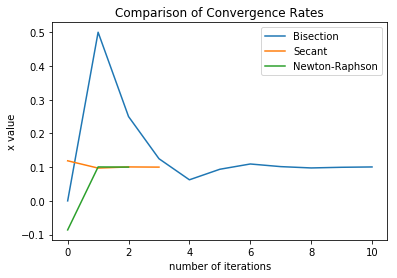

In [59]:
plt.plot(biarray(fcx,-1,1))
plt.plot(secarray(fcx,-1,1))
plt.plot(newraparray(fcx,fpcx,0.8))

plt.ylabel('x value')
plt.xlabel('number of iterations')
plt.title('Comparison of Convergence Rates')
plt.legend(['Bisection','Secant','Newton-Raphson'])

In [60]:
def xieqn(xi, T, e, t):
    parens = xi - e*np.sin(xi)
    first = T*parens/(2*np.pi)
    val = first - t
    return(val)

In [156]:
c = 2.9979*(10**8)
a = c * 2.34186
ecc = 0.617139
T = 27906.98161
t = np.linspace(0, 28800, 999)

def xiroot(xi, time):
    eqn = xieqn(xi, T, ecc, time)
    return(eqn)

def xideriv(xi):
    tee = T/(2*np.pi)
    second = ecc*np.cos(xi)
    val = tee*(1-second)
    return(val)

def newrapecc(fx, fpx, xi0, tarray):
    xiarray = []
    
    for time in tarray:
        yval = fx(xi0, time)
    
        while abs(yval) > 0.0001:
            slope = fpx(xi0)
        
            xi0 = xi0 - (yval/slope)
        
            yval = fx(xi0, time)
            
        xiarray.append(xi0)
        
    return(xiarray)


In [80]:
xitestvals = np.array(newrapecc(xiroot, xideriv, 0.1, t))

In [81]:
def ellx(xi):
    parens = np.cos(xi) - ecc
    x = a * parens
    return(x)

def elly(xi):
    root = 1 - ecc**2
    y = a * root * np.sin(xi)
    return(y)

In [171]:
ellxtest = ellx(xitestvals) / (10**8)
ellytest = elly(xitestvals) / (10**8)

Text(0.5,1,'Elliptical Orbit')

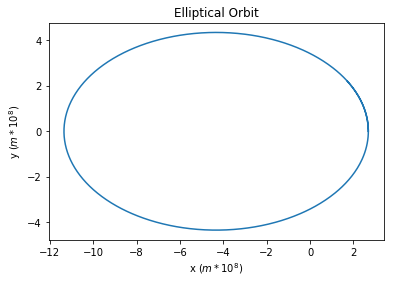

In [172]:
plt.plot(ellxtest,ellytest)
plt.xlabel('x ($m * 10^8$)')
plt.ylabel('y ($m * 10^8$)')
plt.title('Elliptical Orbit')

In [127]:
def newrap2(fx, fpx, x0, *xarg):
    yval = fx(x0, xarg)
    
    while abs(yval) > 0.01:
        slope = fpx(x0)
        
        x0 = x0 - (yval/slope)
        
        yval = fx(x0, xarg)
        
    return(x0)

def xderiv(t, dt):
    xiorig = newrap2(xiroot, xideriv, t/28800, t)
    xidel = newrap2(xiroot, xideriv, t/28800, (t+dt))
    
    xorig = ellx(xiorig)
    xdel = ellx(xidel)
    
    val = (xdel - xorig)/dt
    return(val)

def yderiv(t, dt):
    xiorig = newrap2(xiroot, xideriv, t/28800, t)
    xidel = newrap2(xiroot, xideriv, t/28800, (t+dt))
    
    yorig = elly(xiorig)
    ydel = elly(xidel)
    
    val = (ydel - yorig)/dt
    return(val)

In [128]:
newrap2(xiroot,xideriv,0.1,0.1)

array([5.88066675e-05])

In [129]:
[xderiv(0.1,0.1),ellx(5.88e-05),yderiv(0.1,0.1),elly(5.88e-05)]

[array([-36.41841829]),
 268793769.7834175,
 array([255618.58252495]),
 25559.001119416236]

Not sure I trust this result...

In [195]:
def derivvec(t,dt):
    xval = xderiv(t,dt)[0]
    yval = yderiv(t,dt)[0]
    
    return([xval,yval])

def unitvec(phi):
    cosval = np.cos(phi)
    sinval = np.sin(phi)
    
    return([cosval,sinval])

def vecdot(phi, t, dt):
    uv = unitvec(phi)
    dv = derivvec(t,dt)
    
    dp = np.dot(uv,dv)
    
    return(dp)

def complist(phi, t, dt):
    uv = unitvec(phi)
    dv = derivvec(t,dt)
    dp = np.dot(uv,dv)
    
    return(uv,dv,dp)

def veclist(phi, tlist, dt):
    vecs=[]
    for time in tlist:
        dot = vecdot(phi, time, dt)
        vecs.append(dot)
        #print(len(vecs))
    return(vecs)

In [162]:
complist(3.6, 8000, 10)

([-0.896758416334147, -0.44252044329485246],
 [-86250.61332300902, -45209.70175107718],
 97352.1806715052)

In [163]:
complist(3.6, 4000, 10)

([-0.896758416334147, -0.44252044329485246],
 [-163162.47515187264, 5339.077541536093],
 143954.67186188677)

In [196]:
t2 = np.linspace(-14400,-12050,100)
t3 = np.linspace(-11950,0,400)
dottedvals = veclist(-np.pi/2, t, 10)
dottedvals2 = veclist(-np.pi/2, t2, 10)
dottedvals3 = veclist(-np.pi/2, t3, 10)

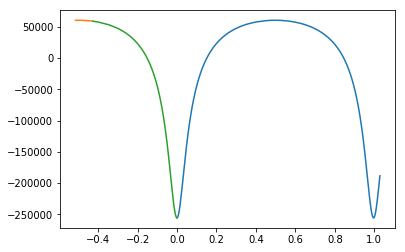

In [197]:
plt.plot(t/28000, dottedvals)
plt.plot(t2/28000, dottedvals2)
plt.plot(t3/28000, dottedvals3)

Had to skip sections in the values here because the method was going off to infinity, hence the different t ranges.